# 🎓 **Applied Artificial Intelligence Master**

## 🤖 **Course: Advanced Machine Learning Methods (Gpo 10)**

### 🏛️ Tecnológico de Monterrey

#### 👨‍🏫 **Lead Professor:** Dr. José Antonio Cantoral Ceballos
#### 👩‍🏫 **Assistant Professor:** Dra. Yetnalezi Quintas Ruiz

### 📊 **Activity 2a: Implementing a FC for ASL Dataset Using PyTorch**

#### 📅 **February 11th, 2025**

### 👥 Team 3

#### **Students:**
* 🧑‍💻 Luis Gerardo Sanchez Salazar (A01232963)
* 🧑‍💻 Javier Augusto Rebull Saucedo (A01795838)
* 🧑‍💻 José Manuel Toral Cruz (A01122243)
* 🧑‍💻 Juan Carlos Pérez Nava (A01795941)
* 🧑‍💻 Oscar Enrique García García (A01016093)

---

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks using PyTorch
<br>

#### Activity 2a: Implementing a FC for ASL Dataset using PyTorch
<br>


- Objective

    The primary aim of this activity is to transition from using Numpy for network implementation to utilizing PyTorch, a powerful deep learning framework. You will be replicating the work you did for the ASL dataset in Activity 1b, but this time, you'll implement a your multi layer FC model using PyTorch.
    
- Instructions

    Review Previous Work: Begin by reviewing your Numpy-based Fully Connected Network for the ASL dataset from Activity 1b. Note the architecture, hyperparameters, and performance metrics for comparison.

    Introduce PyTorch: If you're new to PyTorch, take some time to familiarize yourself with its basic operations and syntax. You can consult the official documentation or follow online tutorials.

    Prepare the ASL Dataset: As before, download and preprocess the Kaggle ASL dataset.

    Implement the Network: Design your network architecture tailored for the ASL dataset. Pay special attention to PyTorch modules like nn.Linear() and nn.ReLU().

    Train the Model: Implement the training loop, making use of PyTorch's autograd to handle backpropagation. Monitor metrics like loss and accuracy as the model trains.

    Analyze and Document: In Markdown cells, discuss the architecture choices, any differences in performance between the Numpy and PyTorch implementations, and insights gained from using a deep learning framework like PyTorch.

In [1]:
# ===============================================
# CATEGORY 1: DATA MANIPULATION AND ANALYSIS
# ===============================================

# NumPy: Fundamental package for numerical computations
import numpy as np

# Pandas: Data manipulation and analysis library
import pandas as pd

# ===============================================
# CATEGORY 2: VISUALIZATION
# ===============================================

# Matplotlib: Comprehensive plotting library
import matplotlib.pyplot as plt

# Jupyter specific command to show plots in notebook
%matplotlib inline

#Only For Jupyter Users
# Custom Jupyter Theme styling
#from jupyterthemes import jtplot
#jtplot.style(grid=False)

# ===============================================
# CATEGORY 3: SYSTEM AND UTILITIES
# ===============================================

# String operations module
import string

# Operating System interface
import os

# ===============================================
# CATEGORY 4: DEEP LEARNING (PyTorch)
# ===============================================

# PyTorch base module: Core deep learning functionalities
import torch

# Neural Network module
import torch.nn as nn

# Functional neural network operations
import torch.nn.functional as F

In [2]:
# Google Drive download utility
import gdown  # For downloading files from Google Drive


# Visualization libraries
import seaborn as sns             # For statistical data visualization
sns.set_style("whitegrid")        # Set seaborn style

%matplotlib inline

# Optional: Set random seed for reproducibility
np.random.seed(42)

# Optional: Configure pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show up to 100 rows

# Optional: Set figure size for better visualization
plt.rcParams['figure.figsize'] = [12, 8]    # Default figure size
plt.rcParams['figure.dpi'] = 100            # Figure resolution

# Optional: Set seaborn plotting context
sns.set_context("notebook", font_scale=1.2)  # Set context for better readability

In [3]:
# Create directory for ASL (American Sign Language) dataset
# Using -p flag to avoid errors if directory already exists
!mkdir -p asl_data

# Define URLs for the training and validation datasets
# These URLs point to Google Drive files containing sign language MNIST data
train_url = (
   'https://drive.google.com/uc?id=112F_j2U-7wysYmpRa6FT4tMw5s6xShFr'
)
valid_url = (
   'https://drive.google.com/uc?id=1hKEKFsw4hRl4UXU0Na-LLLE0sRwb5AIr'
)

# Download datasets using gdown library
# quiet=False shows download progress
print("Downloading training dataset...")
gdown.download(
   train_url,
   'asl_data/sign_mnist_train.csv',
   quiet=False
)

print("Downloading validation dataset...")
gdown.download(
   valid_url,
   'asl_data/sign_mnist_valid.csv',
   quiet=False
)

# Load the downloaded CSV files into pandas DataFrames
print("Loading datasets into memory...")
train_df = pd.read_csv('asl_data/sign_mnist_train.csv')
valid_df = pd.read_csv('asl_data/sign_mnist_valid.csv')

# Print dataset dimensions to verify successful loading
print("\nDataset Information:")
print("-" * 20)
print(f"Training data shape: {train_df.shape}")
print(f"Validation data shape: {valid_df.shape}")

Downloading...
From: https://drive.google.com/uc?id=112F_j2U-7wysYmpRa6FT4tMw5s6xShFr
To: /content/asl_data/sign_mnist_train.csv
100%|██████████| 83.3M/83.3M [00:00<00:00, 103MB/s]


Downloading...
From: https://drive.google.com/uc?id=1hKEKFsw4hRl4UXU0Na-LLLE0sRwb5AIr
To: /content/asl_data/sign_mnist_valid.csv
100%|██████████| 21.8M/21.8M [00:00<00:00, 28.1MB/s]


Loading datasets into memory...

Dataset Information:
--------------------
Training data shape: (27455, 785)
Validation data shape: (7172, 785)


### Always a good idea to explore the data

In [4]:
def explore_dataframe(df, n_rows=5):
    """
    Create a comprehensive data exploration view
    """
    # Style function for numeric columns
    def color_negative_red(val):
        color = 'red' if val < 0 else 'black'
        return f'color: {color}'

    # Basic information about the dataset
    print("📊 Dataset Overview")
    print("=" * 50)
    print(f"🔸 Total Rows: {df.shape[0]:,}")
    print(f"🔸 Total Columns: {df.shape[1]:,}")
    print("\n")

    # Memory usage
    memory_usage = df.memory_usage(deep=True).sum()
    print("💾 Memory Usage")
    print("=" * 50)
    print(f"🔸 Total: {memory_usage / 1024 / 1024:.2f} MB\n")

    # Data types
    print("📝 Data Types")
    print("=" * 50)
    for dtype in df.dtypes.value_counts().items():
        print(f"🔸 {dtype[0]}: {dtype[1]} columns")
    print("\n")

    # Missing values
    missing = df.isnull().sum()
    if missing.any():
        print("⚠️ Missing Values")
        print("=" * 50)
        for col, count in missing[missing > 0].items():
            print(f"🔸 {col}: {count:,} missing values ({count/len(df)*100:.2f}%)")
        print("\n")

    # Display styled dataframe
    styled_df = (df.head(n_rows)
                .style
                .format(precision=2)  # Round numeric values to 2 decimal places
                .map(color_negative_red, subset=df.select_dtypes('number').columns)
                .set_properties(**{
                    'background-color': '#f5f5f5',
                    'border-color': '#888888',
                    'border-style': 'solid',
                    'border-width': '1px',
                    'padding': '8px',
                    'color': 'black'
                })
                .set_table_styles([
                    {'selector': 'th',
                     'props': [('background-color', '#2F4F4F'),
                              ('color', 'white'),
                              ('font-weight', 'bold'),
                              ('padding', '8px'),
                              ('border', '1px solid #888888')]},
                    {'selector': 'caption',
                     'props': [('caption-side', 'top'),
                              ('font-size', '1.25em'),
                              ('font-weight', 'bold'),
                              ('color', '#2F4F4F')]}
                ])
                .set_caption("🔍 Data Preview"))

    display(styled_df)

    # Basic statistics for numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        print("\n📈 Numeric Columns Statistics")
        print("=" * 50)
        stats_df = df[numeric_cols].describe()
        styled_stats = (stats_df
                       .style
                       .format(precision=2)
                       .set_properties(**{
                           'background-color': '#f5f5f5',
                           'border-color': '#888888',
                           'border-style': 'solid',
                           'border-width': '1px',
                           'padding': '8px',
                           'color': 'black'  # Text Color
                       })
                       .set_table_styles([
                           {'selector': 'th',
                            'props': [('background-color', '#2F4F4F'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold'),
                                    ('padding', '8px'),
                                    ('border', '1px solid #888888')]},
                           {'selector': 'td',  # Style for Cells
                            'props': [('color', 'black')]}
                       ]))
        display(styled_stats)

# Usage:
explore_dataframe(train_df)

📊 Dataset Overview
🔸 Total Rows: 27,455
🔸 Total Columns: 785


💾 Memory Usage
🔸 Total: 164.43 MB

📝 Data Types
🔸 int64: 785 columns





📈 Numeric Columns Statistics


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

### Get training label data

In [5]:
# Check if 'label' exists in the DataFrames
if 'label' in train_df.columns and 'label' in valid_df.columns:
   # Convert the target variable ('label' column) from training data to a numpy array
   y_train = np.array(train_df['label'])
   # Convert the target variable ('label' column) from validation data to a numpy array
   y_val = np.array(valid_df['label'])

   # Remove the 'label' column from training dataframe since it's now stored in y_train
   del train_df['label']
   # Remove the 'label' column from validation dataframe since it's now stored in y_val
   del valid_df['label']

   print("Label column successfully processed")
else:
   print("Warning: 'label' column not found in one or both DataFrames")
   print("Available columns in training data:", train_df.columns.tolist())
   print("Available columns in validation data:", valid_df.columns.tolist())
   y_train = None
   y_val = None

# Convert training features to numpy array and cast to float32 regardless of label presence
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

Label column successfully processed


In [6]:
def print_data_shapes(x_train, x_val, y_train=None, y_val=None):
   """
   Display data shapes in a clean, formatted table
   """
   print("\n📊 Data Shapes Overview")
   print("=" * 40)

   # Create a formatted table header
   print(f"{'Dataset':<15} {'Shape':<15} {'Size'}")
   print("-" * 40)

   # Training data
   print(f"{'X Train':<15} {str(x_train.shape):<15} {x_train.size:,}")
   print(f"{'X Val':<15} {str(x_val.shape):<15} {x_val.size:,}")

   # Only print y shapes if they exist
   if y_train is not None and y_val is not None:
       print(f"{'Y Train':<15} {str(y_train.shape):<15} {y_train.size:,}")
       print(f"{'Y Val':<15} {str(y_val.shape):<15} {y_val.size:,}")

   print("=" * 40)

   # Print additional information if available
   if y_train is not None:
       print(f"\n📈 Classes Distribution:")
       print("-" * 40)
       unique, counts = np.unique(y_train, return_counts=True)
       for class_label, count in zip(unique, counts):
           print(f"Class {class_label:<8} {count:,} samples ({count/len(y_train)*100:.2f}%)")

# Use the function
print_data_shapes(x_train, x_val, y_train, y_val)


📊 Data Shapes Overview
Dataset         Shape           Size
----------------------------------------
X Train         (27455, 784)    21,524,720
X Val           (7172, 784)     5,622,848
Y Train         (27455,)        27,455
Y Val           (7172,)         7,172

📈 Classes Distribution:
----------------------------------------
Class 0        1,126 samples (4.10%)
Class 1        1,010 samples (3.68%)
Class 2        1,144 samples (4.17%)
Class 3        1,196 samples (4.36%)
Class 4        957 samples (3.49%)
Class 5        1,204 samples (4.39%)
Class 6        1,090 samples (3.97%)
Class 7        1,013 samples (3.69%)
Class 8        1,162 samples (4.23%)
Class 9        1,114 samples (4.06%)
Class 10       1,241 samples (4.52%)
Class 11       1,055 samples (3.84%)
Class 12       1,151 samples (4.19%)
Class 13       1,196 samples (4.36%)
Class 14       1,088 samples (3.96%)
Class 15       1,279 samples (4.66%)
Class 16       1,294 samples (4.71%)
Class 17       1,199 samples (4.37%)
Class 

In [7]:
def split_val_test(x, y, pct=0.5, shuffle=True):
   """
   Split data into validation and test sets.

   Parameters:
   -----------
   x : numpy array
       Feature matrix
   y : numpy array
       Target/label vector
   pct : float, default=0.5
       Percentage of data to use for validation set (0 to 1)
   shuffle : boolean, default=True
       Whether to shuffle the data before splitting

   Returns:
   --------
   x_val : numpy array
       Validation features
   y_val : numpy array
       Validation labels
   x_test : numpy array
       Test features
   y_test : numpy array
       Test labels
   """
   # Verify that x and y have same number of samples
   assert x.shape[0] == y.shape[0], 'Number of samples x != number samples y'

   # Get total number of samples
   total_samples = x.shape[0]

   # Shuffle data if requested
   if shuffle:
       # Create array of indices and shuffle them
       idxs = np.arange(x.shape[0])
       np.random.shuffle(idxs)

       # Reorder x and y using shuffled indices
       x = x[idxs]
       y = y[idxs]

   # Calculate split point based on percentage
   split_idx = int(total_samples * pct)

   # Split data into validation and test sets
   x_val = x[:split_idx, :]      # First pct% for validation
   y_val = y[:split_idx]         # Validation labels
   x_test = x[split_idx:, :]     # Remaining (1-pct)% for test
   y_test = y[split_idx:]        # Test labels

   return x_val, y_val, x_test, y_test

In [8]:
def explain_split(x_val, y_val):
    """
    Visualize and explain the data split
    """
    print("\n🔄 Data Split Process Overview")
    print("=" * 50)

    # Show original data size
    print("📊 Original Data:")
    print(f"{'X shape:':<15} {str(x_val.shape):<15} samples")
    print(f"{'Y shape:':<15} {str(y_val.shape):<15} labels")
    print("-" * 50)

    # After split
    x_val_split, y_val_split, x_test, y_test = split_val_test(x_val, y_val)

    print("📈 After 50-50 Split:")
    print("\nValidation Set:")
    print(f"{'X_val shape:':<15} {str(x_val_split.shape):<15} samples")
    print(f"{'Y_val shape:':<15} {str(y_val_split.shape):<15} labels")

    print("\nTest Set:")
    print(f"{'X_test shape:':<15} {str(x_test.shape):<15} samples")
    print(f"{'Y_test shape:':<15} {str(y_test.shape):<15} labels")
    print("=" * 50)

    # Visual representation
    print("\n📊 Visual Split Representation:")
    total = x_val.shape[0]
    split = x_val_split.shape[0]

    print("\nOriginal Data:")
    print("█" * 50)

    print("\nAfter Split:")
    val_bars = "█" * int(25)
    test_bars = "█" * int(25)
    print(f"Validation: {val_bars} {split} samples")
    print(f"Test:      {test_bars} {total - split} samples")

    return x_val_split, y_val_split, x_test, y_test

# Use the function
x_val, y_val, x_test, y_test = explain_split(x_val, y_val)


🔄 Data Split Process Overview
📊 Original Data:
X shape:        (7172, 784)     samples
Y shape:        (7172,)         labels
--------------------------------------------------
📈 After 50-50 Split:

Validation Set:
X_val shape:    (3586, 784)     samples
Y_val shape:    (3586,)         labels

Test Set:
X_test shape:   (3586, 784)     samples
Y_test shape:   (3586,)         labels

📊 Visual Split Representation:

Original Data:
██████████████████████████████████████████████████

After Split:
Validation: █████████████████████████ 3586 samples
Test:      █████████████████████████ 3586 samples


In [9]:
def check_data_type(data, name="Data"):
    """
    Display detailed type information of a variable
    """
    print(f"\n🔍 Type Information for {name}")
    print("=" * 40)
    print(f"Python type: {type(data)}")

    # Check if it's a NumPy array
    if hasattr(data, 'dtype'):
        print(f"NumPy dtype: {data.dtype}")

    print("=" * 40)

# Usage
check_data_type(y_val, "y_val")


🔍 Type Information for y_val
Python type: <class 'numpy.ndarray'>
NumPy dtype: int64


In [10]:
def display_alphabet_info(alphabet):
   """
   Display alphabet information in a visually appealing way
   """
   print("\n🔤 Alphabet Analysis")
   print("=" * 50)

   # Show original alphabet
   print("📝 Original Alphabet:")
   print(' '.join(list(string.ascii_lowercase)))
   print("-" * 50)

   # Create alphabet list and remove letters
   alphabet = list(string.ascii_lowercase)  # Convert string to list of letters
   alphabet.remove('j')                     # Remove letter 'j'
   alphabet.remove('z')                     # Remove letter 'z'

   # Show modified alphabet
   print("📋 Modified Alphabet:")
   print(' '.join(alphabet))
   print("-" * 50)

   # Show removed letters
   print("❌ Removed Letters:")
   print("'j', 'z'")
   print("-" * 50)

   # Show counts
   print("📊 Counts:")
   print(f"Original length: 26 letters")
   print(f"Current length:  {len(alphabet)} letters")
   print(f"Letters removed: 2")
   print("=" * 50)

   return alphabet

# Execute the function
alphabet = display_alphabet_info(list(string.ascii_lowercase))


🔤 Alphabet Analysis
📝 Original Alphabet:
a b c d e f g h i j k l m n o p q r s t u v w x y z
--------------------------------------------------
📋 Modified Alphabet:
a b c d e f g h i k l m n o p q r s t u v w x y
--------------------------------------------------
❌ Removed Letters:
'j', 'z'
--------------------------------------------------
📊 Counts:
Original length: 26 letters
Current length:  24 letters
Letters removed: 2


### Normalise the data

In [11]:
def normalise(x_mean, x_std, x_data):
   """
   Normalize the data using z-score normalization (standardization)

   Parameters:
   -----------
   x_mean : float or numpy array
       Mean value(s) to subtract from x_data
   x_std : float or numpy array
       Standard deviation value(s) to divide by
   x_data : numpy array
       Data to be normalized

   Returns:
   --------
   numpy array
       Normalized data where each feature has mean=0 and std=1
       Calculated as: (x - mean) / std
   """
   # Apply z-score normalization formula: (x - μ) / σ
   return (x_data - x_mean) / x_std

In [12]:
def visualize_normalization(x_train, x_val, x_test):
   """
   Normalize data and display the process with visual representation
   """
   print("\n📊 Data Normalization Process")
   print("=" * 60)

   # Calculate mean and standard deviation from training data
   x_mean = x_train.mean()
   x_std = x_train.std()

   print("📈 Statistics Before Normalization:")
   print("-" * 60)
   print(f"{'Dataset':<12} {'Mean':^15} {'Std':^15} {'Min':^8} {'Max':^8}")
   print("-" * 60)
   print(f"{'Train':<12} {x_train.mean():^15.4f} {x_train.std():^15.4f} {x_train.min():^8.2f} {x_train.max():^8.2f}")
   print(f"{'Validation':<12} {x_val.mean():^15.4f} {x_val.std():^15.4f} {x_val.min():^8.2f} {x_val.max():^8.2f}")
   print(f"{'Test':<12} {x_test.mean():^15.4f} {x_test.std():^15.4f} {x_test.min():^8.2f} {x_test.max():^8.2f}")

   # Apply normalization to all datasets
   x_train_norm = normalise(x_mean, x_std, x_train)
   x_val_norm = normalise(x_mean, x_std, x_val)
   x_test_norm = normalise(x_mean, x_std, x_test)

   print("\n📊 Statistics After Normalization:")
   print("-" * 60)
   print(f"{'Dataset':<12} {'Mean':^15} {'Std':^15} {'Min':^8} {'Max':^8}")
   print("-" * 60)
   print(f"{'Train':<12} {x_train_norm.mean():^15.4f} {x_train_norm.std():^15.4f} {x_train_norm.min():^8.2f} {x_train_norm.max():^8.2f}")
   print(f"{'Validation':<12} {x_val_norm.mean():^15.4f} {x_val_norm.std():^15.4f} {x_val_norm.min():^8.2f} {x_val_norm.max():^8.2f}")
   print(f"{'Test':<12} {x_test_norm.mean():^15.4f} {x_test_norm.std():^15.4f} {x_test_norm.min():^8.2f} {x_test_norm.max():^8.2f}")

   # Visual representation of the normalization effect
   print("\n📉 Distribution Visualization (sample):")
   print("-" * 60)
   print("Before: ", end="")
   for _ in range(int(x_train[0][0] * 10)): print("█", end="")
   print(f" ({x_train[0][0]:.2f})")

   print("After:  ", end="")
   for _ in range(int(x_train_norm[0][0] * 10 + 10)): print("█", end="")
   print(f" ({x_train_norm[0][0]:.2f})")

   print("\n🎯 Expected values after normalization:")
   print("- Mean should be close to 0")
   print("- Standard deviation should be close to 1")
   print("=" * 60)

   return x_train_norm, x_val_norm, x_test_norm

# Apply normalization and visualize the process
x_train, x_val, x_test = visualize_normalization(x_train, x_val, x_test)



📊 Data Normalization Process
📈 Statistics Before Normalization:
------------------------------------------------------------
Dataset           Mean             Std         Min      Max   
------------------------------------------------------------
Train           159.2908         48.7695       0.00    255.00 
Validation      160.5909         49.0684       0.00    255.00 
Test            160.5513         49.0166       0.00    255.00 

📊 Statistics After Normalization:
------------------------------------------------------------
Dataset           Mean             Std         Min      Max   
------------------------------------------------------------
Train            0.0000          1.0000       -3.27     1.96  
Validation       0.0267          1.0061       -3.27     1.96  
Test             0.0258          1.0051       -3.27     1.96  

📉 Distribution Visualization (sample):
------------------------------------------------------------
Before: ███████████████████████████████████████████

In [13]:
# Calculate mean and standard deviation of x_train
x_train.mean(), x_train.std()  # Returns a tuple of (mean, std)
                              # mean(): calculates average of all values
                              # std(): calculates how spread out values are from mean

(3.6268384e-06, 0.99999946)

In [14]:
def plot_number(image):
   # Set the size of the plot to 5x5 inches
   plt.figure(figsize=(5,5))

   # Display the image:
   # - squeeze() removes single-dimensional entries from array shape
   # - cmap='gray' sets colormap to grayscale
   plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))

   # Remove axes for cleaner visualization
   plt.axis('off')

   # Display the plot
   plt.show()

In [15]:
# Usage
check_data_type(x_val, "x_val")


🔍 Type Information for x_val
Python type: <class 'numpy.ndarray'>
NumPy dtype: float32


In [16]:
def plot_asl_samples(x_data, y_data, n_samples=3, random_seed=None):
    """
    Visualize random ASL (American Sign Language) letter samples.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    n_samples : int, optional (default=3)
        Number of random samples to display
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """

    # Set random seed if provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Create alphabet list (excluding 'j' and 'z' which require movement)
    alphabet = list(string.ascii_lowercase)
    alphabet.remove('j')  # 'j' requires a motion
    alphabet.remove('z')  # 'z' requires a motion

    # Set up the figure with adequate size
    plt.figure(figsize=(5*n_samples, 5))

    # Plot each random sample
    for i in range(n_samples):
        # Generate random index
        idx = np.random.randint(len(y_data))

        # Create subplot
        plt.subplot(1, n_samples, i+1)

        # Reshape and display image
        img = x_data[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')

        # Add title with letter information
        plt.title(f'Letter: {alphabet[y_data[idx]].upper()}',
                 fontsize=14,
                 pad=10,
                 fontweight='bold')

        # Remove axes for cleaner visualization
        plt.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


          🤟 ASL Letters Visualization 🤟           


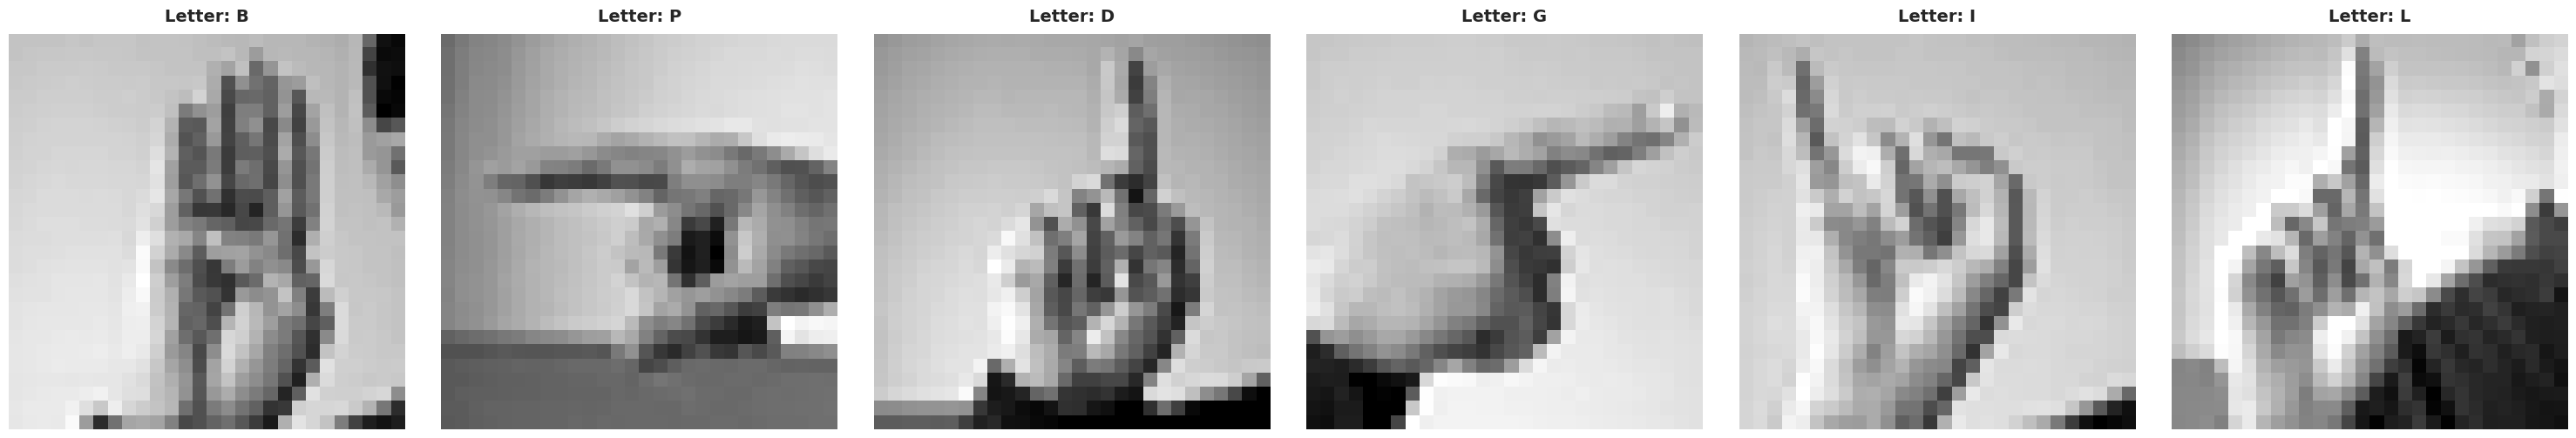

In [17]:
# Example usage with test data
def plot_single_asl(x_data, y_data, random_seed=None):
    """
    Visualize a single random ASL letter sample.

    Parameters:
    -----------
    x_data : array-like
        The image data
    y_data : array-like
        The corresponding labels
    random_seed : int, optional (default=None)
        Random seed for reproducibility
    """
    plot_asl_samples(x_data, y_data, n_samples=1, random_seed=random_seed)

# Print information about displayed samples
print("\n" + "="*50)
print("🤟 ASL Letters Visualization 🤟".center(50))
print("="*50)

# Example calls:
# For multiple samples
plot_asl_samples(x_test, y_test, n_samples=6)

# For a single sample
# plot_single_asl(x_test, y_test)

### The model

## Neural Network Forward Pass and Loss Calculation Equations

--------------------------------------------------------------------
1️⃣ First Layer (Input → Hidden Layer)
--------------------------------------------------------------------
$$z^1 = W^1 X + b^1$$

- W¹: Weight matrix for first layer
- X:  Input data
- b¹: Bias vector
- z¹: Pre-activation values

--------------------------------------------------------------------
2️⃣ Activation Function
--------------------------------------------------------------------
$$a^1 = ReLU(z^1)$$

- ReLU(x) = max(0,x)
- Keeps positive values
- Sets negative values to 0
- a¹: Activated values of hidden layer

--------------------------------------------------------------------
3️⃣ Second Layer (Hidden → Output Layer)
--------------------------------------------------------------------
$$z^2 = W^2 a^1 + b^2$$

- W²: Weight matrix for second layer
- a¹: Activated values from previous layer
- b²: Bias vector
- z²: Pre-activation output values

--------------------------------------------------------------------
4️⃣ Softmax Function (Probability Distribution)
--------------------------------------------------------------------
$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$

- e^z: Exponential of each output
- Denominator normalizes values
- ŷ: Predicted probabilities (sum to 1)

--------------------------------------------------------------------
5️⃣ Cross-Entropy Loss (Single Sample)
--------------------------------------------------------------------
$$ \mathcal{L}(\hat{y}^{i}, y^{i}) = - y^{i} \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$

- y^i: True label (one-hot encoded)
- ŷ^i: Predicted probability
- ln: Natural logarithm

--------------------------------------------------------------------
6️⃣ Cost Function (Average Loss)
--------------------------------------------------------------------
$$ \mathcal{J}(w, b) = \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

- Averages loss across all samples
- num_samples: Total training examples
- Goal: Minimize this during training

--------------------------------------------------------------------

### Create minibatches

In [18]:
def create_minibatches(mb_size, x, y, shuffle=True):
    """
    Creates mini-batches from input data (x, y).

    Args:
        mb_size: Mini-batch size.
        x: Input features (numpy array).
        y: Input labels (numpy array).
        shuffle: Whether to shuffle the data (default: True).

    Returns:
        A generator yielding (x_batch, y_batch) tuples.
    """
    assert x.shape[0] == y.shape[0], 'Sample size mismatch in x and y.'

    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    return ((x[i:i + mb_size], y[i:i + mb_size]) for i in range(0, total_data, mb_size))

In [19]:
# Iterate through mini-batches and print information
for i, (x_batch, y_batch) in enumerate(create_minibatches(128, x_train, y_train)):
    print(f"Mini-batch: {i+1}")  # Descriptive output: "Mini-batch: 1", "Mini-batch: 2", etc.
    print("-" * 20)  # Separator for better readability

Mini-batch: 1
--------------------
Mini-batch: 2
--------------------
Mini-batch: 3
--------------------
Mini-batch: 4
--------------------
Mini-batch: 5
--------------------
Mini-batch: 6
--------------------
Mini-batch: 7
--------------------
Mini-batch: 8
--------------------
Mini-batch: 9
--------------------
Mini-batch: 10
--------------------
Mini-batch: 11
--------------------
Mini-batch: 12
--------------------
Mini-batch: 13
--------------------
Mini-batch: 14
--------------------
Mini-batch: 15
--------------------
Mini-batch: 16
--------------------
Mini-batch: 17
--------------------
Mini-batch: 18
--------------------
Mini-batch: 19
--------------------
Mini-batch: 20
--------------------
Mini-batch: 21
--------------------
Mini-batch: 22
--------------------
Mini-batch: 23
--------------------
Mini-batch: 24
--------------------
Mini-batch: 25
--------------------
Mini-batch: 26
--------------------
Mini-batch: 27
--------------------
Mini-batch: 28
--------------------
M

### Now the PyTorch part

## Introduction to PyTorch: Your Deep Learning Toolkit

PyTorch is a powerful, open-source machine learning library primarily used for developing and training deep learning models. It's known for its flexibility, ease of use, and strong community support.  Think of it as a sophisticated set of building blocks for creating neural networks.  Here's a breakdown of its key features and why it's so popular:

**Key Concepts:**

*   **Tensors:**  At the heart of PyTorch are *tensors*.  These are similar to NumPy arrays but with a crucial difference: they can be used on GPUs (Graphics Processing Units) for significant speedups.  A tensor is essentially a multi-dimensional array that can hold numbers, vectors, matrices, or even higher-dimensional data.

*   **Dynamic Computation Graph:** Unlike some other frameworks that use *static* graphs, PyTorch uses a *dynamic* computation graph. This means the graph is built on-the-fly as your code runs.  This makes debugging much easier and allows for more flexible model architectures, especially when dealing with variable-length inputs (like text or sequences).  It's like building with LEGOs – you can change the structure as you go, rather than having a fixed blueprint.

*   **Automatic Differentiation (Autograd):**  One of PyTorch's most valuable features is its automatic differentiation engine, `autograd`.  This automatically calculates the gradients (derivatives) needed for training neural networks using backpropagation.  You don't have to manually compute these complex calculations; PyTorch handles it for you. This is like having a built-in calculator for the slopes of your model's functions.

*   **Modules (`torch.nn`)**: PyTorch provides a module called `torch.nn` that contains the building blocks for creating neural networks.  These include layers (like linear layers, convolutional layers, recurrent layers), activation functions (like ReLU, sigmoid, tanh), and loss functions (like cross-entropy, mean squared error).  It's like a toolbox filled with pre-made components.

*   **Optimizers (`torch.optim`)**:  The `torch.optim` module provides various optimization algorithms (like SGD, Adam, RMSprop) that update the model's parameters during training to minimize the loss function.  These are the engines that drive the learning process.

*   **Data Loading (`torch.utils.data`)**:  PyTorch offers utilities for efficient data loading and preprocessing through `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`.  These help you manage large datasets and feed them to your model in batches. This streamlines the often-tedious process of preparing your data.

**Why Choose PyTorch?**

*   **Pythonic:** PyTorch integrates seamlessly with the Python ecosystem (NumPy, SciPy, etc.). Its syntax is intuitive and feels natural to Python programmers.
*   **Flexibility:** The dynamic computation graph makes it easy to experiment with different model architectures and handle complex data flows.
*   **Debugging:** Debugging is easier in PyTorch compared to frameworks with static graphs. You can use standard Python debugging tools.
*   **GPU Acceleration:** PyTorch leverages GPUs to dramatically speed up training, making it practical to work with large models and datasets.
*   **Strong Community and Ecosystem:**  A large and active community means plenty of resources, tutorials, and pre-trained models are available.
*   **Production Ready:**  PyTorch provides tools for deploying models to production environments, including mobile devices.

**In a Nutshell:**

PyTorch provides a comprehensive environment for deep learning, from building and training models to deploying them. Its combination of flexibility, ease of use, and powerful features makes it a top choice for both researchers and practitioners.  It's a great choice if you value a Python-friendly approach and the ability to easily experiment with new ideas.


In [20]:
# Convert the training data (x_train, y_train) to PyTorch tensors.
# .copy() is used to create a copy of the NumPy arrays.  This is important:
# 1.  It prevents unintended modifications to the original NumPy arrays
#     when we modify the tensors.
# 2.  It ensures that the tensor's data is stored in contiguous memory,
#     which can improve performance.
x_train_tensor = torch.tensor(x_train.copy())  # Features (training set)
y_train_tensor = torch.tensor(y_train.copy())  # Labels (training set)

# Convert the validation data (x_val, y_val) to PyTorch tensors.
# The validation set is used to tune hyperparameters and monitor performance
# during training, to prevent overfitting to the training data.
x_val_tensor = torch.tensor(x_val.copy())    # Features (validation set)
y_val_tensor = torch.tensor(y_val.copy())    # Labels (validation set)

# Convert the test data (x_test, y_test) to PyTorch tensors.
# The test set is used after training is complete to evaluate the final
# performance of the model on unseen data.
x_test_tensor = torch.tensor(x_test.copy())   # Features (test set)
y_test_tensor = torch.tensor(y_test.copy())   # Labels (test set)

In [21]:
# Determine the device to use for computation (GPU if available, otherwise CPU).
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create a simple visual indicator.
if device == 'cuda':
    device_indicator = "\033[32m\033[1mCUDA (GPU)\033[0m 🟢"  # Green, bold text + green circle
    # In Google Colab Runtimes that provides CUDA
    #A100 GPU
    #L4 GPU
    #T4 GPU
else:
    device_indicator = "\033[31m\033[1mCPU\033[0m 🔴"      # Red, bold text + red circle

# Print the result
print(f"Using device: {device_indicator}")

Using device: CPU 🔴


### Accuracy

In [22]:
def accuracy(model, x, y, mb_size):
    """
    Calculates the accuracy and average loss of a model on a given dataset.

    Args:
        model: The PyTorch model to evaluate.
        x: The input data (features) as a PyTorch tensor.
        y: The target data (labels) as a PyTorch tensor.
        mb_size: The mini-batch size.

    Returns:
        A tuple containing:
            - The average loss over all mini-batches.
            - The accuracy (proportion of correctly classified samples).
    """
    num_correct = 0  # Initialize the count of correctly classified samples.
    num_total = 0    # Initialize the total count of samples.
    cost = 0.        # Initialize the accumulated loss.

    model.eval()  # Set the model to evaluation mode.  This is important!
    # It deactivates things like dropout and batch normalization,
    # which are only used during training.

    model = model.to(device=device)  # Move the model to the specified device (CPU or GPU).

    with torch.no_grad():  # Disable gradient calculation.  This is crucial for evaluation:
        # 1. It saves memory because we don't need to store intermediate values.
        # 2. It speeds up computation.
        # 3. It prevents accidental parameter updates during evaluation.

        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x, y), 1):
            # Iterate through mini-batches.  'enumerate' starts at 1 (instead of 0)
            # for more natural mini-batch counting in the output.

            xi = xi.to(device=device, dtype=torch.float32)  # Move the input batch to the device and set data type.
            yi = yi.to(device=device, dtype=torch.long)   # Move the label batch to the device and set data type.

            scores = model(xi)  # Forward pass: Get the model's predictions (scores for each class).
            # scores will have shape (mb_size, num_classes)

            cost += (F.cross_entropy(scores, yi)).item() # Calculate the cross-entropy loss and add to the total cost.
            # .item() extracts the scalar value of the loss from the tensor.
            # We accumulate the loss over all mini-batches.

            _, pred = scores.max(dim=1)  # Get the predicted class labels.
            # scores.max(dim=1) returns a tuple: (max_values, indices).
            # We only need the indices (predicted labels), so we use "_" to discard the max_values.
            # pred will have shape (mb_size).

            num_correct += (pred == yi.squeeze()).sum()  # Count the number of correct predictions.
            # yi.squeeze() removes dimensions of size 1. This handles cases where y might have an extra
            # dimension (e.g., shape (mb_size, 1) instead of (mb_size)). This ensures
            # correct comparison with "pred".
            # "(pred == yi.squeeze())" creates a boolean tensor where 'True' indicates a correct prediction.
            # '.sum()' counts the number of 'True' values (i.e., correct predictions).

            num_total += pred.size(0)  # Increment the total number of samples processed.
            # 'pred.size(0)' gives the size of the first dimension (which is the batch size).

        return cost / mb, float(num_correct) / num_total  # Return the average loss and the accuracy.
        # 'cost / mb' gives the average loss per mini-batch.
        # 'float(num_correct) / num_total' calculates the accuracy.

### Training Loop

In [23]:
def train(model, optimiser, mb_size, epochs=100):
    """Trains a PyTorch model.

    Args:
        model: The PyTorch model to train.
        optimiser: The optimizer (e.g., Adam, SGD).
        mb_size: Mini-batch size.
        epochs: Number of training epochs (default: 100).
    """
    history = {'loss': [], 'val_acc': []}
    model_local = model.to(device=device)

    # --- Header ---
    print("=" * 50)
    print("        Neural Network Training Initiated         ".center(50))
    print("=" * 50)
    print("\n")

    for epoch in range(epochs):
        losses = []  # Initialize losses list PER EPOCH
        train_correct_num = 0.  # Reset correct counts
        train_total = 0.        # Reset total samples
        train_cost_acum = 0     # Reset loss accumulator

        # Training loop
        for mb, (xi, yi) in enumerate(create_minibatches(mb_size, x_train_tensor, y_train_tensor), 1):
            model_local.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            scores = model_local(xi)
            cost = F.cross_entropy(input=scores, target=yi.squeeze())

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            # Update metrics
            losses.append(cost.item())  # Store batch loss
            train_correct_num += (torch.argmax(scores, dim=1) == yi.squeeze()).sum()
            train_total += scores.size(0)
            train_cost_acum += cost.item()

        # Epoch-level calculations
        avg_loss = np.mean(losses)  # Now using actual recorded losses
        val_cost, val_acc = accuracy(model_local, x_val_tensor, y_val_tensor, mb_size)
        train_acc = float(train_correct_num) / train_total

        # Store metrics in history
        history['loss'].append(avg_loss)
        history['val_acc'].append(val_acc)

        # --- Progress Reporting ---
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1:03d}/{epochs:03d} | Train Cost: {avg_loss:.4f} | Val Cost: {val_cost:.4f} | "
                  f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | LR: {optimiser.param_groups[0]['lr']:.6f}")

    # --- Footer ---
    print("\n" + "=" * 50)
    print("                Training Complete!                ".center(50))
    test_acc = accuracy(model, x_test_tensor, y_test_tensor, mb_size)[1]
    print(f"              Final Test Accuracy: {test_acc:.2%}              ".center(50))
    print("=" * 50)

    return history, model_local  # Return the metrics dictionary

### Model using Sequential

In [24]:
# --- Model Instantiation ---

# Define the number of neurons in the hidden layer.
hidden = 200

# Define the learning rate.
lr = 1e-3

# Define the number of training epochs.
epochs = 100

# Define the mini-batch size.
mb_size = 128

# Define the model architecture using nn.Sequential.
model1 = nn.Sequential(
    nn.Linear(in_features=784, out_features=hidden),  # Linear layer 1: 784 input features, 'hidden' output features.
    nn.Dropout(),  # Dropout layer for regularization (prevents overfitting).
    nn.ReLU(),  # ReLU activation function (introduces non-linearity).
    nn.Linear(in_features=hidden, out_features=24)  # Linear layer 2: 'hidden' input features, 24 output features (classes).
)

# Define the optimizer. Use Adam with weight decay for regularization.
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, weight_decay=1e-4)

# Define the learning rate scheduler. Use OneCycleLR.
# Note:  steps_per_epoch=215 might be incorrect. It should be calculated based on your training data size
#        and mini-batch size: steps_per_epoch = len(x_train) // mb_size
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, 0.1, epochs=epochs, steps_per_epoch=215)

# Train the model using the defined 'train' function (assumed to be defined elsewhere).
history, trained_model = train(model1, optimiser, mb_size, epochs)

        Neural Network Training Initiated         


Epoch 001/100 | Train Cost: 0.8858 | Val Cost: 0.7693 | Train Acc: 0.7205 | Val Acc: 0.7646 | LR: 0.004000
Epoch 011/100 | Train Cost: 0.1872 | Val Cost: 1.7693 | Train Acc: 0.9540 | Val Acc: 0.7950 | LR: 0.004000
Epoch 021/100 | Train Cost: 0.1532 | Val Cost: 2.1292 | Train Acc: 0.9647 | Val Acc: 0.7962 | LR: 0.004000
Epoch 031/100 | Train Cost: 0.1366 | Val Cost: 2.2177 | Train Acc: 0.9687 | Val Acc: 0.8168 | LR: 0.004000
Epoch 041/100 | Train Cost: 0.1827 | Val Cost: 2.3638 | Train Acc: 0.9652 | Val Acc: 0.8104 | LR: 0.004000
Epoch 051/100 | Train Cost: 0.1765 | Val Cost: 2.3015 | Train Acc: 0.9654 | Val Acc: 0.8076 | LR: 0.004000
Epoch 061/100 | Train Cost: 0.1634 | Val Cost: 2.6515 | Train Acc: 0.9671 | Val Acc: 0.8132 | LR: 0.004000
Epoch 071/100 | Train Cost: 0.1395 | Val Cost: 2.4458 | Train Acc: 0.9708 | Val Acc: 0.8028 | LR: 0.004000
Epoch 081/100 | Train Cost: 0.1527 | Val Cost: 2.1878 | Train Acc: 0.9698 | Val Acc: 0.8201

In [25]:
# Evaluate model on test data
test_loss, test_accuracy = accuracy(trained_model, x_test_tensor, y_test_tensor, mb_size)  # Corrected line

print("\n" + "=" * 50)
print("📊 Final Model Evaluation 📊".center(50))
print("=" * 50)

# Format accuracy as percentage
accuracy_percentage = test_accuracy * 100

# Check performance and display appropriate message
if accuracy_percentage >= 70:
    print(f"\n🌟 Exceptional Performance! 🌟")
    print(f"Test Accuracy: {accuracy_percentage:.2f}% ")
    print("🎯 Great job! Model is performing well! 🎉")
else:
    print(f"\n📉 Performance Below Expectations 📉")
    print(f"Test Accuracy: {accuracy_percentage:.2f}% ")
    print("💪 Keep improving! More training might help 🔄")

print("=" * 50 + "\n")


            📊 Final Model Evaluation 📊            

🌟 Exceptional Performance! 🌟
Test Accuracy: 81.48% 
🎯 Great job! Model is performing well! 🎉



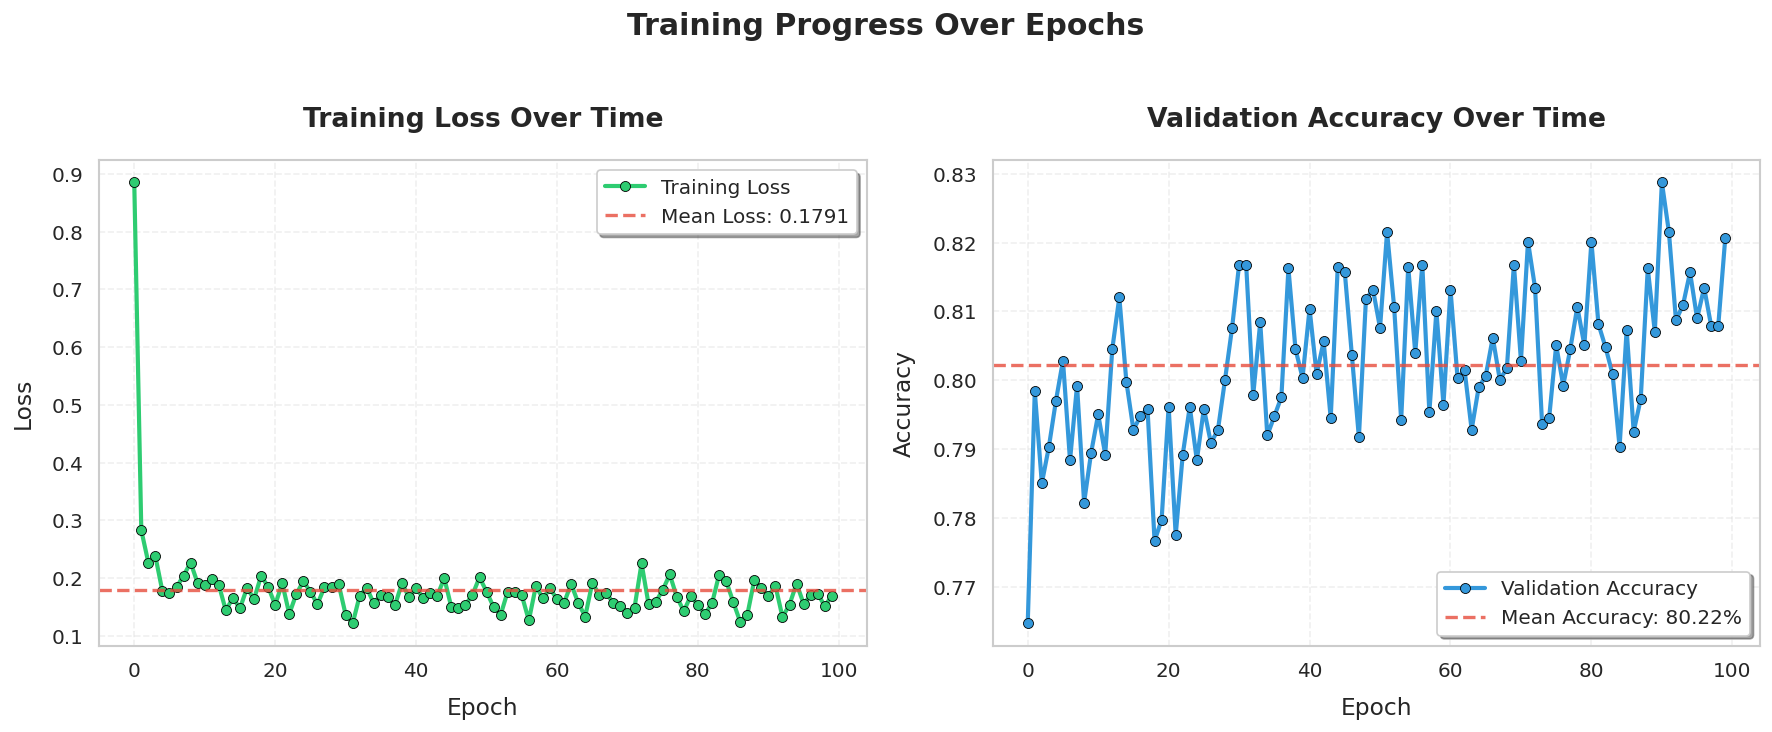


              📊 Training Summary Statistics 📊               
• Final Loss: 0.1695
• Final Accuracy: 82.07%
• Best Accuracy: 82.88%



In [26]:
# Create a figure with specified size and higher DPI for better quality
plt.figure(figsize=(15, 6), dpi=120)

# Calculate mean metrics for reference lines
mean_loss = np.mean(history['loss'])
mean_acc = np.mean(history['val_acc'])

# Add a main title for the entire figure
plt.suptitle('Training Progress Over Epochs', fontsize=18, fontweight='bold', y=1.02)

# First subplot: Training Loss (left side)
plt.subplot(1, 2, 1)
plt.plot(history['loss'],
         linewidth=2.5,
         label='Training Loss',
         color='#2ecc71',  # Green color
         marker='o',  # Add markers for each epoch
         markersize=6,
         markeredgecolor='black',
         markeredgewidth=0.5)
plt.axhline(y=mean_loss,
            color='#e74c3c',  # Red color
            linestyle='--',
            alpha=0.8,
            linewidth=2,
            label=f'Mean Loss: {mean_loss:.4f}')
plt.title('Training Loss Over Time', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, labelpad=10)
plt.ylabel('Loss', fontsize=14, labelpad=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Second subplot: Validation Accuracy (right side)
plt.subplot(1, 2, 2)
plt.plot(history['val_acc'],
         linewidth=2.5,
         label='Validation Accuracy',
         color='#3498db',  # Blue color
         marker='o',  # Add markers for each epoch
         markersize=6,
         markeredgecolor='black',
         markeredgewidth=0.5)
plt.axhline(y=mean_acc,
            color='#e74c3c',  # Red color
            linestyle='--',
            alpha=0.8,
            linewidth=2,
            label=f'Mean Accuracy: {mean_acc*100:.2f}%')
plt.title('Validation Accuracy Over Time', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=14, labelpad=10)
plt.ylabel('Accuracy', fontsize=14, labelpad=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12, loc='lower right', frameon=True, fancybox=True, shadow=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add more space between subplots
plt.subplots_adjust(wspace=0.4)  # Increase spacing between subplots

# Show the plot
plt.tight_layout()
plt.show()

# Print summary statistics with enhanced formatting
print("\n" + "="*60)
print("📊 Training Summary Statistics 📊".center(60))
print("="*60)
print(f"• Final Loss: {history['loss'][-1]:.4f}")
print(f"• Final Accuracy: {history['val_acc'][-1]*100:.2f}%")
print(f"• Best Accuracy: {max(history['val_acc'])*100:.2f}%")
print("="*60 + "\n")


             Single Letter Prediction             



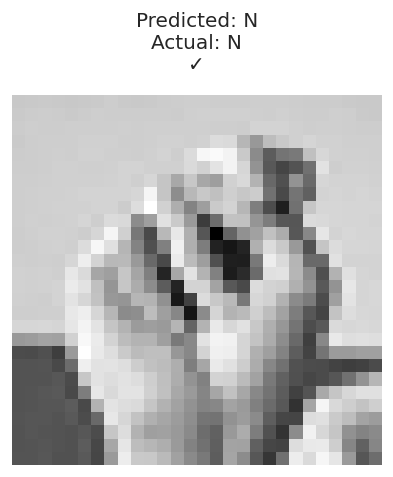


Prediction: N | Actual: N | Correct!

           Multiple Letter Predictions            



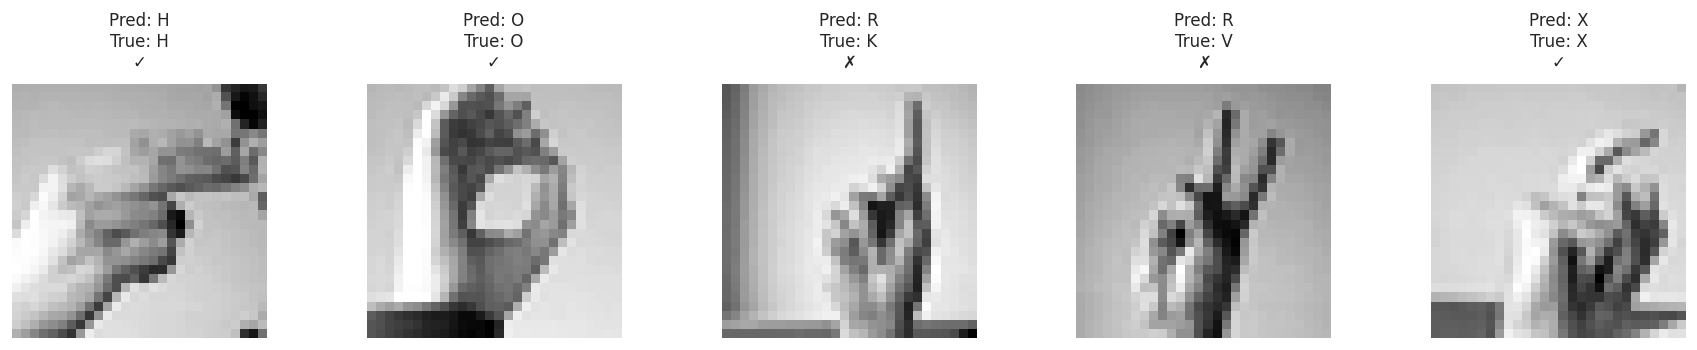


Prediction Details:
--------------------------------------------------
Letter 1: Predicted 'H' | Actual 'H' | 🎯 Correct!
Letter 2: Predicted 'O' | Actual 'O' | 🎯 Correct!
Letter 3: Predicted 'R' | Actual 'K' | ❌ Incorrect!
Letter 4: Predicted 'R' | Actual 'V' | ❌ Incorrect!
Letter 5: Predicted 'X' | Actual 'X' | 🎯 Correct!
--------------------------------------------------



In [27]:
def predict(x, model):
    x = x.to(device=device, dtype=torch.float32)
    scores = model(x)  # mb_size, num_classes
    _, pred = scores.max(dim=1)  # pred shape (mb_size)
    return pred

print("\n" + "="*50)
print("       Single Letter Prediction       ".center(50))
print("="*50 + "\n")

# --- Single Prediction Visualization ---
rnd_idx = np.random.randint(len(y_test))
actual_letter = alphabet[y_test[rnd_idx]]

# Reshape for plotting and prediction
img_to_plot = x_test[rnd_idx].reshape(28, 28)
img_to_predict = x_test_tensor[rnd_idx].reshape(1, -1)

# Make prediction
pred = predict(img_to_predict, trained_model)
predicted_letter = alphabet[pred.item()]  # Use .item() to get the scalar value

# Determine if prediction is correct
is_correct = (pred.item() == y_test[rnd_idx])
status_emoji = "✓" if is_correct else "✗"
status_text = "Correct!" if is_correct else "Incorrect!"

# Create figure with a single subplot
plt.figure(figsize=(4, 4), dpi=120)
plt.imshow(img_to_plot, cmap='gray')
plt.axis('off')  # Hide axes
plt.title(f'Predicted: {predicted_letter.upper()}\nActual: {actual_letter.upper()}\n{status_emoji}',
          fontsize=12, pad=15)
plt.show()

print(f"\nPrediction: {predicted_letter.upper()} | Actual: {actual_letter.upper()} | {status_text}")
print("\n" + "="*50)
print("     Multiple Letter Predictions     ".center(50))
print("="*50 + "\n")


# --- Multiple Predictions Visualization ---

plt.figure(figsize=(15, 3), dpi=120)

# Store indices for consistency
num_predictions = 5
indices = [np.random.randint(len(y_test)) for _ in range(num_predictions)]
predictions = []
actual_values = []

# Make 'num_predictions' predictions and show images
for i, idx in enumerate(indices):
    plt.subplot(1, num_predictions, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    pred = predict(x_test_tensor[idx].reshape(1, -1), trained_model)
    predictions.append(pred.item())  # Store as Python integer
    actual_values.append(y_test[idx])

    is_correct = (pred.item() == y_test[idx])
    status_emoji = "✓" if is_correct else "✗"
    plt.title(
        f'Pred: {alphabet[pred.item()].upper()}\nTrue: {alphabet[y_test[idx]].upper()}\n{status_emoji}',
        pad=10, fontsize=10
    )

plt.tight_layout()
plt.show()

# Print summary of predictions using the same indices
print("\nPrediction Details:")
print("-" * 50)
for i in range(num_predictions):
    is_correct = (predictions[i] == actual_values[i])
    status = "🎯 Correct!" if is_correct else "❌ Incorrect!"
    print(f"Letter {i + 1}: Predicted '{alphabet[predictions[i]].upper()}' | "
          f"Actual '{alphabet[actual_values[i]].upper()}' | {status}")
print("-" * 50 + "\n")

#Team Conclusions

This activity provided practical experience implementing a fully connected neural network in PyTorch for ASL image classification.  We successfully built, trained, and evaluated the model, gaining insights into data preprocessing, model architecture selection, and hyperparameter tuning. While the network demonstrated some success, the results suggest that a convolutional neural network (CNN) would likely be better suited to capture the spatial complexities of the ASL dataset, making this a valuable foundation for exploring more advanced architectures.

## References

**Books**

Raschka, S., Liu, Y. (. , Mirjalili, V., & Dzhulgakov, D. (2022). *Machine learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python*. Packt Publishing.

**Papers**

He, K., Zhang, X., Ren, S., & Sun, J. (2015). Deep residual learning for image recognition. *Proceedings of the IEEE conference on computer vision and pattern recognition*, 770-778. [https://doi.org/10.48550/arXiv.1512.03385](https://www.google.com/search?q=https://doi.org/10.48550/arXiv.1512.03385)

He, K., Zhang, X., Ren, S., & Sun, J. (2015). Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification. *Proceedings of the IEEE international conference on computer vision*, 1026-1034. [https://doi.org/10.48550/arXiv.1502.01852](https://www.google.com/search?q=https://doi.org/10.48550/arXiv.1502.01852)

Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. *International Conference on Machine Learning*, 448–456. [https://doi.org/10.48550/arXiv.1502.03167](https://www.google.com/url?sa=E&source=gmail&q=https://doi.org/10.48550/arXiv.1502.03167)

Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). ImageNet classification with deep convolutional neural networks. *Advances in neural information processing systems*, *25*.  [https://proceedings.neurips.cc/paper\_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf](https://www.google.com/url?sa=E&source=gmail&q=https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)

Simonyan, K., & Zisserman, A. (2015). Very deep convolutional networks for large-scale image recognition.  *arXiv preprint arXiv:1409.1556*. [https://doi.org/10.48550/arXiv.1409.1556](https://www.google.com/url?sa=E&source=gmail&q=https://doi.org/10.48550/arXiv.1409.1556)

**Videos**

[Pepe Cantoral, Ph-D.]. (2021, March 18). *Gradiente de la Función de Pérdida “Cross Entropy” con Softmax - Deep Learning - (Parte 8)* [Video]. YouTube. [https://youtu.be/mSqaQt6Dnow](https://youtu.be/mSqaQt6Dnow)

[Pepe Cantoral, Ph-D.]. (2021, March 19). *Backpropagation - Gradient Descent, Ejemplo completo –Fundamentos de Deep Learning – (Parte 9)* [Video]. YouTube. [https://youtu.be/\_sej5wurIsg?si=iFbOsvMexti80tI3](https://youtu.be/_sej5wurIsg?si=iFbOsvMexti80tI3)

[Pepe Cantoral, Ph-D.]. (2021, March 27). *Funciones de Activación – Fundamentos de Deep Learning – (Parte 10)* [Video]. YouTube. [https://youtu.be/IdlYuBKeFXo?si=NAzwOER0Q1E9k9D-](https://youtu.be/IdlYuBKeFXo?si=NAzwOER0Q1E9k9D-)

[Pepe Cantoral, Ph-D.]. (2021, March 31). *Redes Neuronales Multi-Capa / Deep Neural Networks – Fundamentos de Deep Learning -(Teoría parte 11)* [Video]. YouTube. [https://youtu.be/Xc2Gsx2DkJA?si=lDhRFNyVCj4MNADR](https://youtu.be/Xc2Gsx2DkJA?si=lDhRFNyVCj4MNADR)

[Pepe Cantoral, Ph-D.]. (2021, May 15). *¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING\!* [Video]. YouTube. [https://youtu.be/\_shpKyA89QQ?si=HphJOAhfI2OcLN4v](https://youtu.be/_shpKyA89QQ?si=HphJOAhfI2OcLN4v)

[Pepe Cantoral, Ph-D.]. (2021, May 18). *¡Red Neuronal Desde Cero estilo FRAMEWORK de DEEP LEARNING - Parte 2\!* [Video]. YouTube. [https://youtu.be/l2v2mVcOx6o?si=ZRkpRhE6qnM1GGVH](https://youtu.be/l2v2mVcOx6o?si=ZRkpRhE6qnM1GGVH)

[Pepe Cantoral, Ph-D.]. (2021, July 6). *¡Red Neuronal usando PyTorch\! PyTorch tutorial* [Video]. YouTube. [https://youtu.be/qQELiV1\_GHA?si=pmXuHl47zqM5o6GC](https://youtu.be/qQELiV1_GHA?si=pmXuHl47zqM5o6GC)

[Pepe Cantoral, Ph-D.]. (2021, December 11). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 1* [Video]. YouTube. [https://www.youtube.com/watch?v=cUa3Jug3TiA](https://www.youtube.com/watch?v=cUa3Jug3TiA)

[Pepe Cantoral, Ph-D.]. (2021, December 13). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 2* [Video]. YouTube. [https://www.youtube.com/watch?v=xkZD5eB5KVM](https://www.youtube.com/watch?v=xkZD5eB5KVM)

[Pepe Cantoral, Ph-D.]. (2021, December 17). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 3* [Video]. YouTube. [https://www.youtube.com/watch?v=XkqgTaWle0I](https://www.youtube.com/watch?v=XkqgTaWle0I)

[Pepe Cantoral, Ph-D.]. (2021, December 17). *Redes Neuronales Convolucionales / Convolutional Neural Networks (CNN) – Parte 4* [Video]. YouTube. [https://youtu.be/w9ECvUxMAJQ](https://youtu.be/w9ECvUxMAJQ)

[Pepe Cantoral, Ph-D.]. (2022, January 15). *Red Neuronal Convolucional en PyTorch / Tutorial de PyTorch para CNN - Parte 1* [Video]. YouTube. [https://youtu.be/yUB9JQQVtoU?si=\_VhrWUfEy8Kgrjwg](https://youtu.be/yUB9JQQVtoU?si=_VhrWUfEy8Kgrjwg)

[Pepe Cantoral, Ph-D.]. (2022, January 18). *Red Neuronal Convolucional en PyTorch / Tutorial de PyTorch para CNN - Parte 2* [Video]. YouTube. [https://youtu.be/NLrQZwnWjvI?si=j7bNbY0Trrjyv6ZA](https://youtu.be/NLrQZwnWjvI?si=j7bNbY0Trrjyv6ZA)

[Pepe Cantoral, Ph-D.]. (2022, April 27). *¿Qué es ResNet? – Redes Neuronales Residuales* [Video]. YouTube. [https://youtu.be/gKCuWBpg1bU?si=UyG8K67GIvw6g6L5](https://youtu.be/gKCuWBpg1bU?si=UyG8K67GIvw6g6L5)